# Dictionary Learning

* Implementing atom extraction using dictionary learning to build a sparse dataset

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.DictionaryLearning.html

### Import Libraries

In [1]:
import gzip
import numpy as np

from matplotlib import pyplot as plt

### Load and Pre-process Data

* The NotMNIST dataset comprises 28x28 grayscale images of 70,000 letters from A - J in total 10 categories, and 6,000 images per category.

https://github.com/davidflanagan/notMNIST-to-MNIST

In [2]:
def extract_data(filename, num_images):
    
    with gzip.open(filename) as bytestream:
        
        bytestream.read(16)
        buf = bytestream.read(28 * 28 * num_images)
        data = np.frombuffer(buf, dtype = np.uint8).astype(np.float32)
        data = data.reshape(num_images, 28, 28)
        
        return data

In [3]:
train_data = extract_data('../datasets/train-images-idx3-ubyte.gz', 60000)

In [4]:
def extract_labels(filename, num_images):
    
    with gzip.open(filename) as bytestream:
        
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype = np.uint8).astype(np.int64)
        
        return labels

In [5]:
print("Training set (images) shape: {shape}".format(shape = train_data.shape))

Training set (images) shape: (60000, 28, 28)


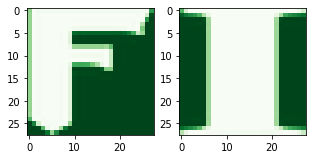

In [6]:
plt.figure(figsize=[5,5])

plt.subplot(121)
curr_img = np.reshape(train_data[0], (28, 28))
plt.imshow(curr_img, cmap = 'Greens_r')


plt.subplot(122)
curr_img = np.reshape(train_data[1], (28, 28))
plt.imshow(curr_img, cmap = 'Greens_r')

In [7]:
sample = train_data[:40]

sample.shape

(40, 28, 28)

In [8]:
sample = sample.reshape(-1, 784)

sample.shape

(40, 784)

In [9]:
from sklearn.decomposition import DictionaryLearning

dict_learn = DictionaryLearning(n_components = 196,
                                fit_algorithm = 'lars',
                                transform_algorithm = 'lasso_lars')

In [10]:
X_dict = dict_learn.fit_transform(sample)

In [11]:
X_dict.shape

(40, 196)

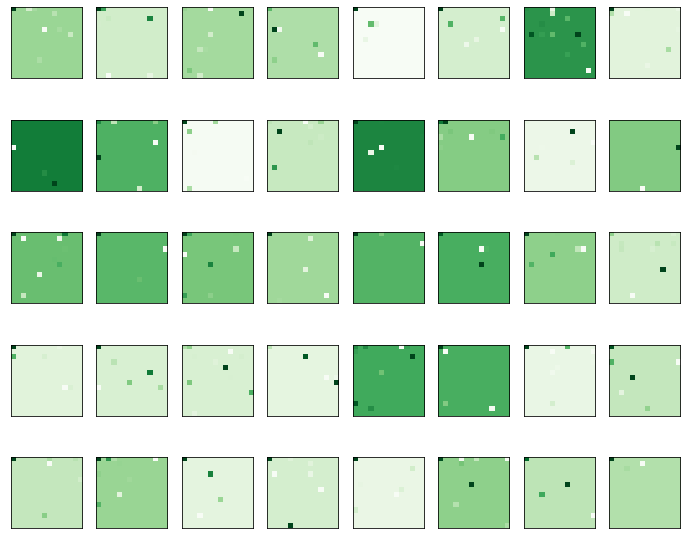

In [12]:
fig = plt.figure(figsize = (12, 10))  

for i in range(40):

    ax = fig.add_subplot(5, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(X_dict[i].reshape(14, 14), cmap = 'Greens_r', interpolation = 'nearest')

## Recreate features from atoms

components_ : array, [n_components, n_features] - dictionary atoms extracted from the data

In [13]:
dict_learn.components_.shape

(196, 784)

In [14]:
X_dict.shape

(40, 196)

In [15]:
import numpy as np

original = np.matmul(X_dict, dict_learn.components_)

In [16]:
original.shape

(40, 784)

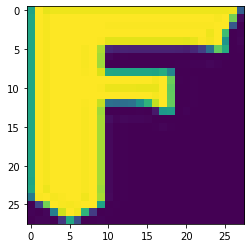

In [17]:
plt.imshow(original[0].reshape(28, 28))

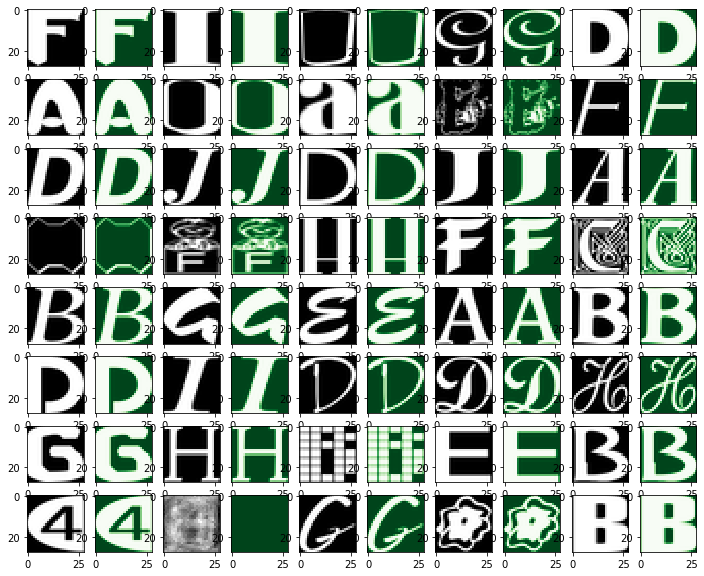

In [18]:
fig = plt.figure(figsize = (12, 10))  
a = 0
b = 0

for i in range(80):
    
    if i%2==0:
        ax = plt.subplot(8, 10, i+1 )
        ax.imshow(original[a].reshape(28, 28), cmap = 'gray')
        a+=1
    else:
        ax = plt.subplot(8, 10, i+1 )
        ax.imshow(sample[b].reshape(28, 28), cmap = 'Greens_r')
        b+=1